# 실습 - Titanic 호 data 를 이용한 Feature Engineering 과 Modeling

Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)  $\rightarrow$ 객실 등급  
survival -  Survival (0 = 사망; 1 = 생존)  $\rightarrow$ 생존여부  
name - Name  
sex - Sex  
age - Age  
sibsp - Number of Siblings/Spouses Aboard  $\rightarrow$ 함께 탑승한 형제 또는 배우자 수   
parch - Number of Parents/Children Aboard  $\rightarrow$ 함께 탑승한 부모 또는 자녀 수  
ticket - Ticket Number  
fare - Passenger Fare (British pound)  
cabin - Cabin  $\rightarrow$ 선실번호  
embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)  $\rightarrow$ 탑승한 항구(얼마나 부유한지와 관련)

In [37]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [38]:
df_titanic = pd.read_csv("titanic.csv")

In [39]:
df_titanic.shape

(891, 12)

In [40]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
df_titanic.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1, inplace=True)
df_titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [42]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [43]:
df_titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [44]:
df_titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Feature Analysis

- feature 간의 correlation check

- Survived 와 각 Feature 간 상관관계 파악

In [45]:
df_titanic.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


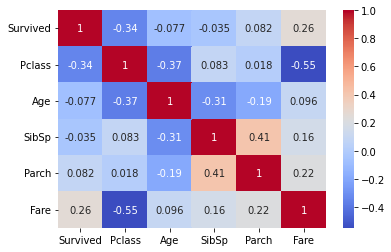

In [46]:
import seaborn as sns

g = sns.heatmap(df_titanic.corr(), annot=True, cmap="coolwarm")

가장 상관 관계가 높은 feature 는 Fare 이고 Pclass 는 가장 상관관계가 낮은 것으로 나타난다.

## Missing Value 처리

In [47]:
df_titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [48]:
df_titanic.shape

(891, 8)

881 개의 data 중 170 개를 drop 시키는 것은 너무 많은 양이므로 Age 는 median 으로 채워주고 Embarked 는 drop 시킨다.

In [49]:
df_titanic['Age'].fillna(df_titanic['Age'].median(), inplace=True)
df_titanic.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [50]:
df_titanic.dropna(inplace=True)
df_titanic.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## Data 의 skewness  check

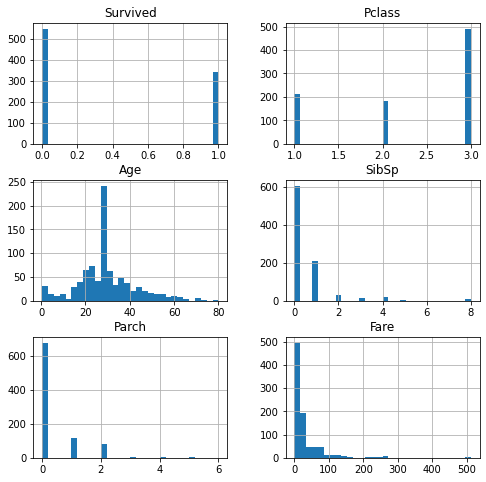

In [51]:
df_titanic.hist(bins=30, figsize=(8, 8));

### Fare 의 분포가 심하게 skew 되어 있으므로 log 값으로 바꾸어 skewness 를 완화 시킨다.

In [52]:
df_titanic['Fare'] = df_titanic['Fare'].map(lambda x: np.log(x) if x > 0 else 0)

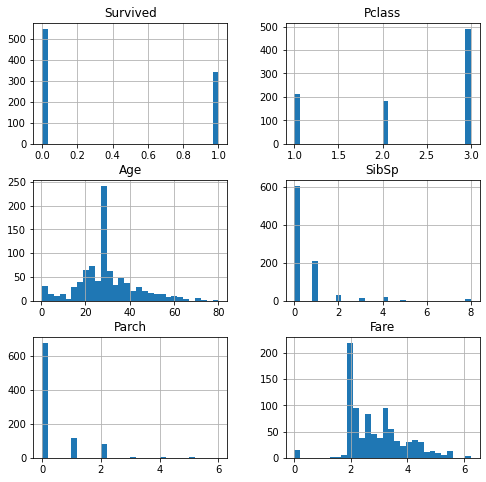

In [53]:
df_titanic.hist(bins=30, figsize=(8, 8));

In [54]:
df_titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,1.981001,S
1,1,1,female,38.0,1,0,4.266662,C
2,1,3,female,26.0,0,0,2.070022,S
3,1,1,female,35.0,1,0,3.972177,S
4,0,3,male,35.0,0,0,2.085672,S


## Category 변수 처리

Category column 들을 one-hot-encoding 으로 변환한다.

In [55]:
df_titanic = pd.get_dummies(df_titanic)
df_titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,1.981001,0,1,0,0,1
1,1,1,38.0,1,0,4.266662,1,0,1,0,0
2,1,3,26.0,0,0,2.070022,1,0,0,0,1
3,1,1,35.0,1,0,3.972177,1,0,0,0,1
4,0,3,35.0,0,0,2.085672,0,1,0,0,1


## Train / Test dataset split

In [56]:
df_titanic.shape

(889, 11)

In [57]:
y = df_titanic['Survived']
X = df_titanic.drop('Survived', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((755, 10), (134, 10), (755,), (134,))

## Standard Scaling

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

## Modeling

In [60]:
import tensorflow as tf
from tensorflow.keras.layers import Dense

model = tf.keras.Sequential()

model.add(Dense(32, input_shape=(10,), activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [61]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])

history = model.fit(X_train_scaled, y_train, epochs=20, 
                    validation_data=(X_test_scaled, y_test))

Epoch 1/20
24/24 [==============================] - 1s 9ms/step - loss: 0.6825 - accuracy: 0.6159 - val_loss: 0.6583 - val_accuracy: 0.5821
Epoch 2/20
24/24 [==============================] - 0s 4ms/step - loss: 0.6107 - accuracy: 0.6715 - val_loss: 0.5951 - val_accuracy: 0.6866
Epoch 3/20
24/24 [==============================] - 0s 4ms/step - loss: 0.5603 - accuracy: 0.7550 - val_loss: 0.5426 - val_accuracy: 0.7687
Epoch 4/20
24/24 [==============================] - 0s 4ms/step - loss: 0.5193 - accuracy: 0.8013 - val_loss: 0.5025 - val_accuracy: 0.7836
Epoch 5/20
24/24 [==============================] - 0s 4ms/step - loss: 0.4912 - accuracy: 0.8013 - val_loss: 0.4701 - val_accuracy: 0.8060
Epoch 6/20
24/24 [==============================] - 0s 3ms/step - loss: 0.4694 - accuracy: 0.8053 - val_loss: 0.4520 - val_accuracy: 0.7985
Epoch 7/20
24/24 [==============================] - 0s 4ms/step - loss: 0.4549 - accuracy: 0.8106 - val_loss: 0.4320 - val_accuracy: 0.7985
Epoch 8/20
24/24 [==

In [62]:
y_pred = model.predict(X_test_scaled) > 0.5

In [63]:
from sklearn.metrics import accuracy_score

print("accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))

accuracy: 0.81
